# Imports

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import copy

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)

In [208]:
games_df = pd.read_csv('game_reports_cumulative.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['year'] = games_df['game_start'].dt.year
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60
games_df.sort_values(['game_start','game_played'], inplace=True)
games_df.reset_index(inplace=True)


player_games_df = games_df.explode('players')
#player_games_df.sort_values(['game_played', 'game_start'], inplace=True)
player_games_df['place'] = player_games_df.groupby(['game_start', 'game_played'])['players'].expanding().count().values
#t * (1+((1-p)/(2n-2))) where t = time, p = place order, and n = # of players
t = player_games_df['game_length_minutes']
p = player_games_df['place']
n = player_games_df['player_count']
player_games_df['score'] = np.round(t * (1+((1-p)/(2*n-2))))
player_games_df


,index,game_played,players,game_start,game_end,year,player_count,game_length,game_length_minutes,place,score
0,0,Revolution,Scoggins,2022-12-09 09:40:00,2022-12-09 10:16:00,2022,3,0 days 00:36:00,36.0,1.0,36.0
0,0,Revolution,Zack,2022-12-09 09:40:00,2022-12-09 10:16:00,2022,3,0 days 00:36:00,36.0,2.0,27.0
0,0,Revolution,Max,2022-12-09 09:40:00,2022-12-09 10:16:00,2022,3,0 days 00:36:00,36.0,3.0,18.0
1,1,Quacks,Celeste,2022-12-09 09:45:00,2022-12-09 11:40:00,2022,4,0 days 01:55:00,115.0,1.0,115.0
1,1,Quacks,Brenna,2022-12-09 09:45:00,2022-12-09 11:40:00,2022,4,0 days 01:55:00,115.0,2.0,96.0
1,1,Quacks,John,2022-12-09 09:45:00,2022-12-09 11:40:00,2022,4,0 days 01:55:00,115.0,3.0,77.0
1,1,Quacks,Hamen,2022-12-09 09:45:00,2022-12-09 11:40:00,2022,4,0 days 01:55:00,115.0,4.0,58.0
2,2,Netrunner,Skylar,2022-12-09 10:00:00,2022-12-09 11:00:00,2022,2,0 days 01:00:00,60.0,1.0,60.0
2,2,Netrunner,Preston,2022-12-09 10:00:00,2022-12-09 11:00:00,2022,2,0 days 01:00:00,60.0,2.0,30.0
3,7,TerraformingMars,Paul,2022-12-09 10:08:00,2022-12-09 14:01:00,2022,4,0 days 03:53:00,233.0,1.0,233.0


In [209]:
player_games_df.groupby('players')['score'].sum()

players
Alecia       194.0
Brenna       727.0
Caitlin      172.0
Camilla       63.0
Celeste      155.0
Dane         366.0
Dani         136.0
Gaby         305.0
Guy          188.0
Hamen         88.0
J            518.0
Jess          25.0
Jesse         45.0
John         733.0
Judson       440.0
Jules        305.0
Karson       781.0
Kate         164.0
Kristi       420.0
Les          767.0
Libby         85.0
Lindsey      158.0
Mac           43.0
Matt          45.0
Matty        333.0
Max         1179.0
Meghann      116.0
Paul         802.0
Preston      526.0
Rachel       781.0
Reed          52.0
Ryan         247.0
Scoggins     367.0
Skylar      1017.0
Toph         434.0
Zack        1081.0
Name: score, dtype: float64

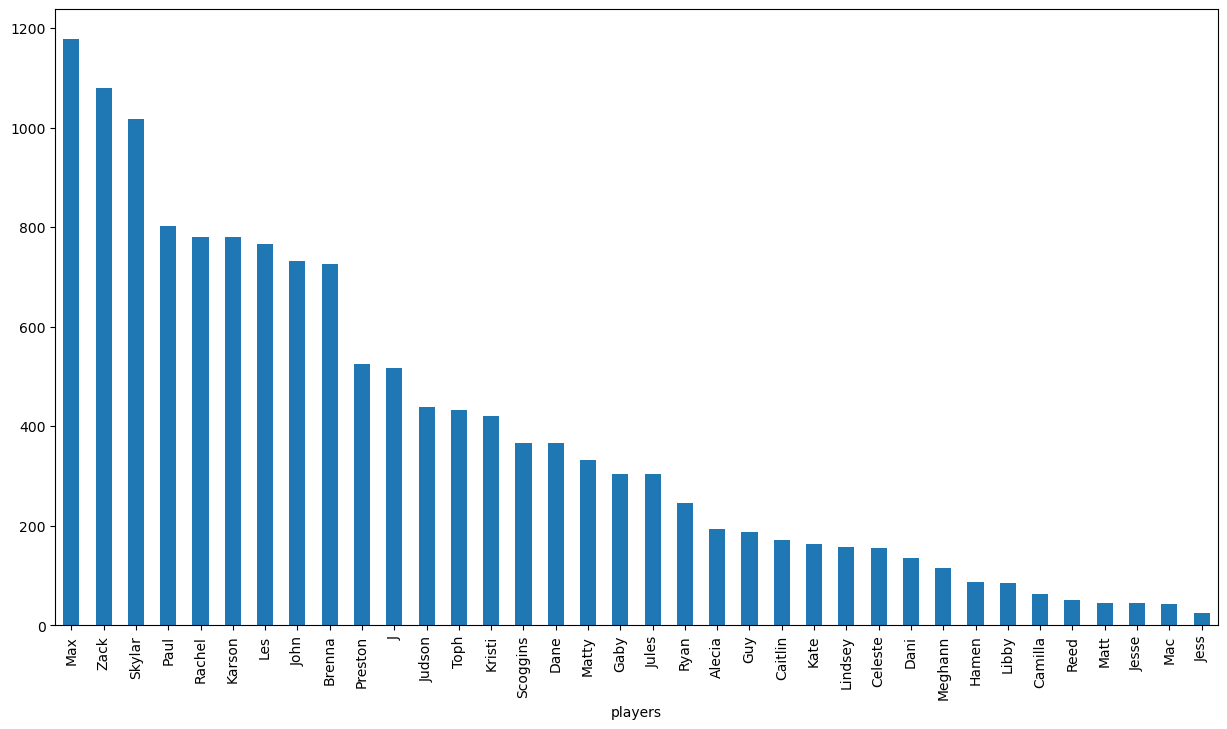

In [210]:
ranking = player_games_df.groupby('players')['score'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 8))

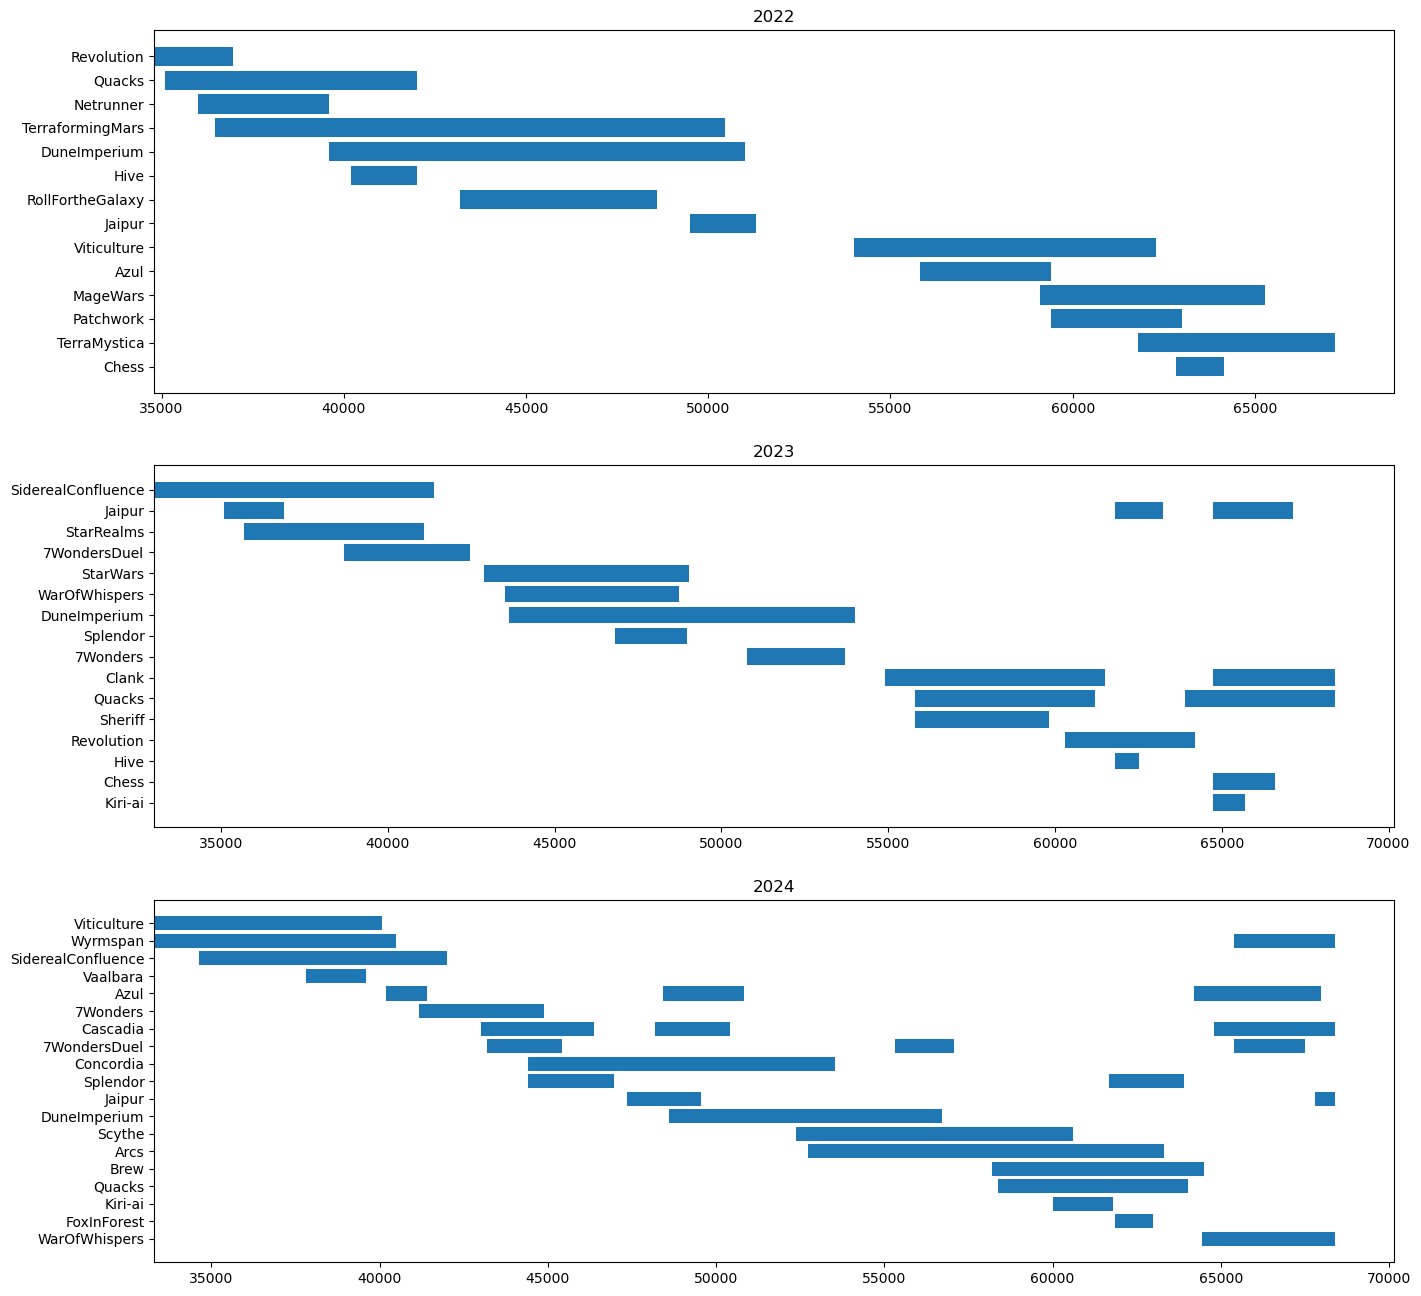

In [211]:
years = np.unique(games_df['year'])

fig, axs = plt.subplots(years.size, figsize=(16,16))
for plot_num, year in enumerate(years):
    gantt = games_df[games_df['year'] == year].sort_values(by='game_start', ascending=True)
    axs[plot_num].barh(gantt['game_played'], (gantt['game_end']-gantt['game_start']).dt.total_seconds(),left=gantt['game_start'].dt.hour*60*60+gantt['game_start'].dt.minute*60)
    axs[plot_num].invert_yaxis()
    axs[plot_num].set_title(year)
plt.show()

In [212]:
years

array([2022, 2023, 2024])

# OpenSkill Ranking

In [213]:
from openskill.models import PlackettLuce

model = PlackettLuce()

In [214]:
games_df

,index,game_played,players,game_start,game_end,year,player_count,game_length,game_length_minutes
0,0,Revolution,"[Scoggins, Zack, Max]",2022-12-09 09:40:00,2022-12-09 10:16:00,2022,3,0 days 00:36:00,36.0
1,1,Quacks,"[Celeste, Brenna, John, Hamen]",2022-12-09 09:45:00,2022-12-09 11:40:00,2022,4,0 days 01:55:00,115.0
2,2,Netrunner,"[Skylar, Preston]",2022-12-09 10:00:00,2022-12-09 11:00:00,2022,2,0 days 01:00:00,60.0
3,7,TerraformingMars,"[Paul, J, Les, Meghann]",2022-12-09 10:08:00,2022-12-09 14:01:00,2022,4,0 days 03:53:00,233.0
4,5,DuneImperium,"[Zack, Max, Caitlin, Skylar]",2022-12-09 11:00:00,2022-12-09 14:10:00,2022,4,0 days 03:10:00,190.0
5,3,Hive,"[Preston, Scoggins]",2022-12-09 11:10:00,2022-12-09 11:40:00,2022,2,0 days 00:30:00,30.0
6,4,RollFortheGalaxy,"[Preston, John, Scoggins, Jesse]",2022-12-09 12:00:00,2022-12-09 13:30:00,2022,4,0 days 01:30:00,90.0
7,6,Jaipur,"[Hamen, Brenna]",2022-12-09 13:45:00,2022-12-09 14:15:00,2022,2,0 days 00:30:00,30.0
8,9,Viticulture,"[Dane, Skylar, Preston, Zack, J, John]",2022-12-09 15:00:00,2022-12-09 17:18:00,2022,6,0 days 02:18:00,138.0
9,8,Azul,"[Max, Brenna, Celeste, Paul]",2022-12-09 15:30:00,2022-12-09 16:30:00,2022,4,0 days 01:00:00,60.0


In [284]:
player_rankings = {player:model.rating(name=player) for player in games_df['players'].explode().drop_duplicates().tolist()}

In [285]:
player_rankings

{'Scoggins': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Zack': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Max': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Celeste': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Brenna': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'John': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Hamen': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Skylar': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Preston': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Paul': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'J': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Les': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Meghann': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Caitlin': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Jesse': PlackettLuceRating(mu=25.0, sigma=8.333333333333334),
 'Dane': PlackettLuceRating(mu=25.0, s

In [286]:
ranking_hist = []
predicted_win_probability = []
for game in games_df['players'].to_list():
    match = [(lambda x: [x])(ranking) for ranking in [player_rankings.get(key) for key in game]]
    predicted_win_probability.append(model.predict_win(match))
    results = model.rate(match)
    print(player_rankings)
    ranking_hist.append(copy.deepcopy(player_rankings))

{'Scoggins': PlackettLuceRating(mu=27.869048680749426, sigma=8.205243377397993), 'Zack': PlackettLuceRating(mu=25.717262170187357, sigma=8.058224222802378), 'Max': PlackettLuceRating(mu=21.413689149063217, sigma=8.058224222802378), 'Celeste': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Brenna': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'John': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Hamen': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Skylar': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Preston': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Paul': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'J': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Les': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Meghann': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Caitlin': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Jesse': PlackettLuceRating(mu=25.0, sigma=8.333333333333334), 'Dane': Pl

In [287]:
#Ordinal based (mu - 3*sigma)
[(player, round(rating.mu,2), round(rating.sigma,2), round(rating.ordinal(),2)) for player, rating in sorted(player_rankings.items(), key=lambda x:x[1].ordinal(), reverse=True)]

[('Max', 39.86, 6.72, 19.69),
 ('Rachel', 38.62, 7.51, 16.08),
 ('Skylar', 33.32, 6.45, 13.97),
 ('Judson', 36.05, 7.36, 13.97),
 ('Kristi', 35.42, 7.44, 13.09),
 ('Karson', 32.49, 6.58, 12.74),
 ('Zack', 29.31, 6.02, 11.26),
 ('Toph', 31.72, 7.38, 9.57),
 ('Scoggins', 27.99, 7.06, 6.8),
 ('Ryan', 28.92, 7.84, 5.39),
 ('Preston', 24.17, 6.89, 3.49),
 ('Celeste', 27.27, 8.0, 3.28),
 ('Dani', 27.93, 8.29, 3.06),
 ('Mac', 26.75, 7.98, 2.8),
 ('Guy', 25.63, 7.67, 2.61),
 ('Caitlin', 25.24, 7.6, 2.44),
 ('Dane', 24.13, 7.31, 2.19),
 ('John', 21.16, 6.45, 1.81),
 ('Matt', 24.56, 7.8, 1.15),
 ('Hamen', 24.03, 7.84, 0.5),
 ('Libby', 24.44, 8.09, 0.17),
 ('Matty', 21.76, 7.47, -0.66),
 ('Alecia', 22.36, 7.67, -0.66),
 ('Les', 19.11, 6.66, -0.87),
 ('Paul', 18.19, 6.59, -1.57),
 ('Reed', 22.3, 8.06, -1.87),
 ('Gaby', 19.19, 7.06, -2.0),
 ('J', 19.36, 7.26, -2.42),
 ('Lindsey', 20.16, 7.62, -2.7),
 ('Meghann', 20.96, 8.08, -3.29),
 ('Camilla', 19.36, 7.55, -3.3),
 ('Brenna', 16.41, 6.59, -3.35),


In [288]:
predicted_win_probability

[[0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 [0.25, 0.25, 0.25, 0.25],
 [0.5, 0.5],
 [0.25, 0.25, 0.25, 0.25],
 [0.2642946386084893,
  0.18514044102639104,
  0.2509886221678573,
  0.29957629819726234],
 [0.33512321711456494, 0.6648767828854351],
 [0.25863174898469254,
  0.24500206173835734,
  0.24552700419340448,
  0.2508391850835456],
 [0.33264170103203844, 0.6673582989679616],
 [0.15403296007275563,
  0.13640390073931694,
  0.18438820657636382,
  0.18867982703791178,
  0.17001093949041932,
  0.16648416608323252],
 [0.2074101590763724,
  0.2102238761246539,
  0.29118298239948687,
  0.29118298239948687],
 [0.49048437676203027, 0.5095156232379697],
 [0.5056948395169685, 0.4943051604830315],
 [0.33743143741513537, 0.6625685625848646],
 [0.5263467298535518, 0.4736532701464482],
 [0.6880074324640051, 0.3119925675359949],
 [0.17663518993043836,
  0.1485689322679553,
  0.1504103540557462,
  0.13629452230212666,
  0.1485689322679553,
  0.12994977918549763,
  0.1095722899902

In [272]:
model.predict_rank([[player_rankings['Max']], [player_rankings['Rachel']]])

[(1, 0.40750031718446633), (2, 0.3275648455147682)]

In [273]:
model.predict_win([[player_rankings['Max']], [player_rankings['Rachel']]])

[0.5423412288268193, 0.45765877117318066]

In [221]:
results

[[PlackettLuceRating(mu=21.16429969458079, sigma=6.452568155903589)],
 [PlackettLuceRating(mu=32.4915146283745, sigma=6.583763496979327)]]

# Network Visualization and Centrality

In [222]:
import networkx as nx
from itertools import combinations, chain

In [223]:
G = nx.Graph()

In [224]:
G.add_nodes_from(np.unique(player_games_df['players'].values))
G.add_edges_from(set(chain(*[list(combinations(game,2)) for game in [sorted(game) for game in games_df['players'].to_list()]])))

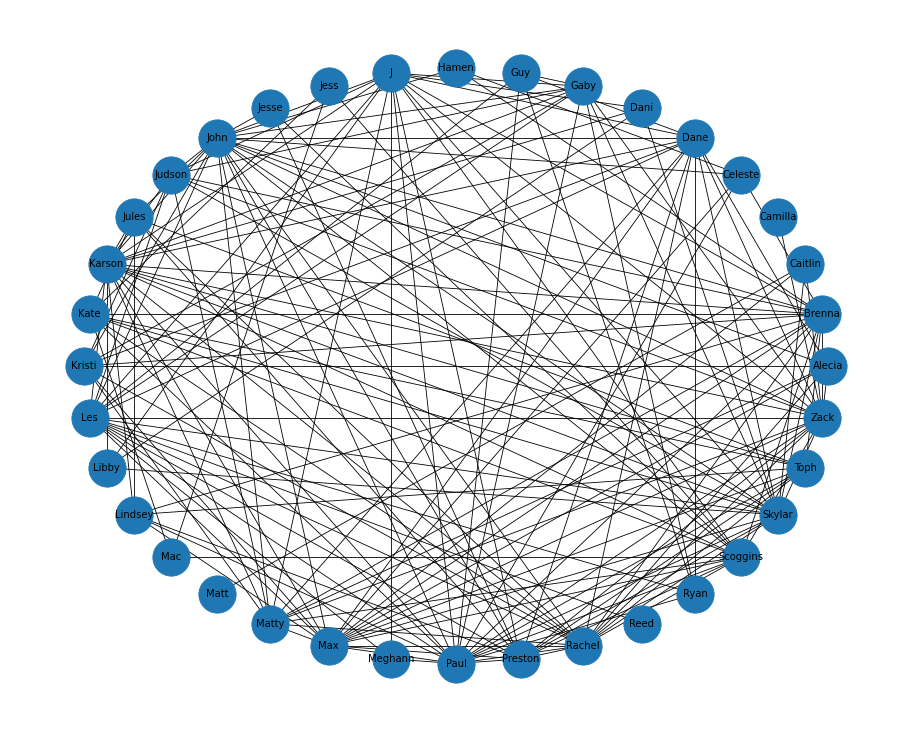

In [225]:
fig = plt.figure(1, figsize=(15,12), dpi=60)
nx.draw_circular(G, with_labels=True, node_size=2000)

In [226]:
def hierarchy_pos(G, root, levels=None, width=1., height=1.):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node
       levels: a dictionary
               key: level number (starting from 0)
               value: number of nodes in this level
       width: horizontal space allocated for drawing
       height: vertical space allocated for drawing'''
    TOTAL = "total"
    CURRENT = "current"
    def make_levels(levels, node=root, currentLevel=0, parent=None):
        """Compute the number of nodes for each level
        """
        if not currentLevel in levels:
            levels[currentLevel] = {TOTAL : 0, CURRENT : 0}
        levels[currentLevel][TOTAL] += 1
        neighbors = G.neighbors(node)
        for neighbor in neighbors:
            if not neighbor == parent:
                levels =  make_levels(levels, neighbor, currentLevel + 1, node)
        return levels

    def make_pos(pos, node=root, currentLevel=0, parent=None, vert_loc=0):
        dx = 1/levels[currentLevel][TOTAL]
        left = dx/2
        pos[node] = ((left + dx*levels[currentLevel][CURRENT])*width, vert_loc)
        levels[currentLevel][CURRENT] += 1
        neighbors = G.neighbors(node)
        for neighbor in neighbors:
            if not neighbor == parent:
                pos = make_pos(pos, neighbor, currentLevel + 1, node, vert_loc-vert_gap)
        return pos
    if levels is None:
        levels = make_levels({})
    else:
        levels = {l:{TOTAL: levels[l], CURRENT:0} for l in levels}
    vert_gap = height / (max([l for l in levels])+1)
    return make_pos({})

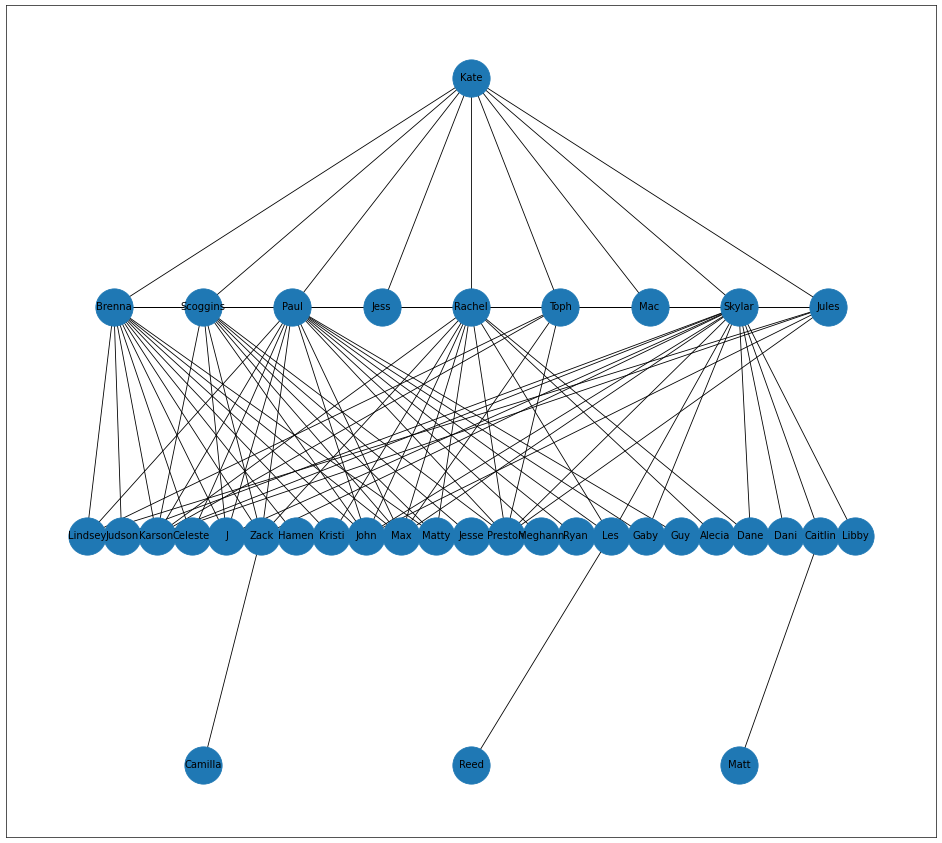

In [227]:
pos = hierarchy_pos(nx.bfs_tree(G, 'Kate'),'Kate')    
fig = plt.figure(2, figsize=(20,18), dpi=60)
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=2000)

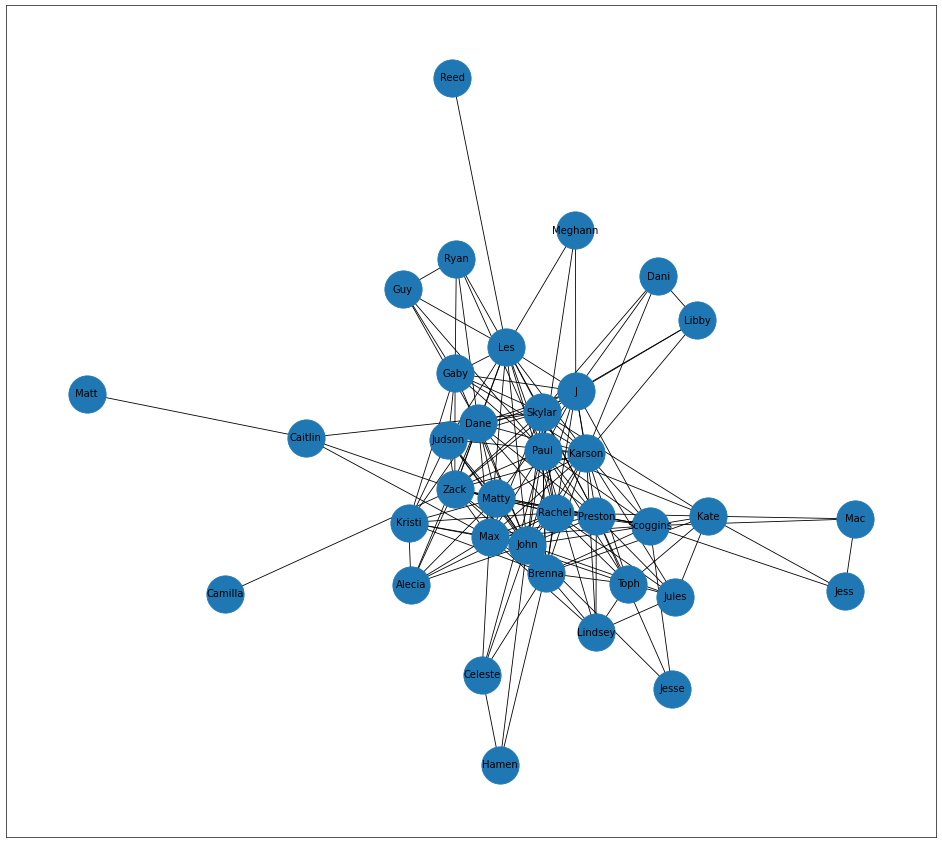

In [228]:
fig = plt.figure(2, figsize=(20,18), dpi=60)
nx.draw_networkx(G, with_labels=True, node_size=2000)

In [229]:
sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('John', 0.6),
 ('Karson', 0.5428571428571428),
 ('Paul', 0.5428571428571428),
 ('Max', 0.5142857142857142),
 ('Zack', 0.5142857142857142),
 ('Brenna', 0.4857142857142857),
 ('Rachel', 0.4857142857142857),
 ('Skylar', 0.4857142857142857),
 ('J', 0.45714285714285713),
 ('Les', 0.45714285714285713),
 ('Dane', 0.39999999999999997),
 ('Preston', 0.39999999999999997),
 ('Scoggins', 0.39999999999999997),
 ('Matty', 0.34285714285714286),
 ('Gaby', 0.3142857142857143),
 ('Judson', 0.2857142857142857),
 ('Kate', 0.2571428571428571),
 ('Kristi', 0.2571428571428571),
 ('Toph', 0.2571428571428571),
 ('Alecia', 0.19999999999999998),
 ('Jules', 0.19999999999999998),
 ('Lindsey', 0.19999999999999998),
 ('Celeste', 0.14285714285714285),
 ('Guy', 0.14285714285714285),
 ('Ryan', 0.14285714285714285),
 ('Caitlin', 0.11428571428571428),
 ('Dani', 0.11428571428571428),
 ('Libby', 0.11428571428571428),
 ('Hamen', 0.08571428571428572),
 ('Jess', 0.08571428571428572),
 ('Jesse', 0.08571428571428572),
 ('Mac'

In [230]:
sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('John', 0.7),
 ('Karson', 0.6730769230769231),
 ('Max', 0.6730769230769231),
 ('Paul', 0.6730769230769231),
 ('Zack', 0.6730769230769231),
 ('Skylar', 0.660377358490566),
 ('Rachel', 0.6481481481481481),
 ('Brenna', 0.6363636363636364),
 ('J', 0.6363636363636364),
 ('Les', 0.6140350877192983),
 ('Preston', 0.6140350877192983),
 ('Scoggins', 0.603448275862069),
 ('Dane', 0.5932203389830508),
 ('Matty', 0.5833333333333334),
 ('Gaby', 0.5645161290322581),
 ('Judson', 0.5555555555555556),
 ('Kate', 0.546875),
 ('Toph', 0.546875),
 ('Lindsey', 0.5147058823529411),
 ('Kristi', 0.5072463768115942),
 ('Alecia', 0.5),
 ('Jules', 0.49295774647887325),
 ('Celeste', 0.4861111111111111),
 ('Caitlin', 0.4666666666666667),
 ('Guy', 0.4605263157894737),
 ('Ryan', 0.4605263157894737),
 ('Jesse', 0.45454545454545453),
 ('Dani', 0.44871794871794873),
 ('Libby', 0.44871794871794873),
 ('Meghann', 0.44871794871794873),
 ('Hamen', 0.4430379746835443),
 ('Camilla', 0.4069767441860465),
 ('Jess', 0.40229885

In [231]:
sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('Zack', 0.10030510572527382),
 ('John', 0.0940157093963322),
 ('Paul', 0.09277727545152162),
 ('Les', 0.08828780490668776),
 ('Scoggins', 0.08790178542279381),
 ('Skylar', 0.07502245187119137),
 ('Max', 0.06895552763817715),
 ('Karson', 0.0649081272437674),
 ('Caitlin', 0.05714285714285715),
 ('J', 0.05005244933569204),
 ('Brenna', 0.04947192067557861),
 ('Kate', 0.036034121313409516),
 ('Rachel', 0.03151143056975978),
 ('Preston', 0.029571193896453418),
 ('Dane', 0.02953192218886733),
 ('Gaby', 0.015669183894591703),
 ('Matty', 0.007342445822426051),
 ('Judson', 0.003812505394314588),
 ('Toph', 0.003473600601628284),
 ('Kristi', 0.0032346271842070163),
 ('Jules', 0.0024835575255743323),
 ('Celeste', 0.0024409763905562224),
 ('Lindsey', 0.001639533641510903),
 ('Alecia', 0.0003734827264239029),
 ('Guy', 0.00033952975129445724),
 ('Ryan', 0.00033952975129445724),
 ('Camilla', 0.0),
 ('Dani', 0.0),
 ('Hamen', 0.0),
 ('Jess', 0.0),
 ('Jesse', 0.0),
 ('Libby', 0.0),
 ('Mac', 0.0),
 ('Mat

In [232]:
sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)

[('John', 0.055322002322511284),
 ('Paul', 0.05094122517301),
 ('Zack', 0.050499869943243084),
 ('Karson', 0.04985935274778586),
 ('Max', 0.048070012185064945),
 ('Skylar', 0.04644260664512795),
 ('Les', 0.04599495563626203),
 ('Brenna', 0.04531246398609458),
 ('Rachel', 0.04418206708510094),
 ('J', 0.043397004282438),
 ('Scoggins', 0.039989102711486736),
 ('Preston', 0.037854219072398824),
 ('Dane', 0.037458325355473145),
 ('Matty', 0.031885649585646596),
 ('Gaby', 0.03057747330564558),
 ('Kate', 0.0278665511589899),
 ('Judson', 0.027322562850195888),
 ('Toph', 0.025336594035063234),
 ('Kristi', 0.024814819975397542),
 ('Jules', 0.02064707177574724),
 ('Lindsey', 0.0204100727337896),
 ('Alecia', 0.020145912396935646),
 ('Caitlin', 0.017922425782767166),
 ('Celeste', 0.01647056756580776),
 ('Guy', 0.016296368139524883),
 ('Ryan', 0.016296368139524883),
 ('Dani', 0.013999639651317947),
 ('Libby', 0.013999639651317947),
 ('Jess', 0.012874647856161176),
 ('Mac', 0.012874647856161176),
 ('

In [233]:
sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)

[('John', 0.2917910967550939),
 ('Karson', 0.27210676992196703),
 ('Zack', 0.2681265688483532),
 ('Max', 0.2599757160356647),
 ('Paul', 0.2578795205408454),
 ('Rachel', 0.25753923119400285),
 ('Skylar', 0.24708673973790626),
 ('Brenna', 0.2414645614032082),
 ('J', 0.2308146120543212),
 ('Les', 0.22492739596541642),
 ('Dane', 0.21096479892138492),
 ('Preston', 0.21012747864568315),
 ('Scoggins', 0.1991610259385848),
 ('Matty', 0.19651175483239208),
 ('Judson', 0.16829591799845162),
 ('Gaby', 0.16533129033314664),
 ('Kristi', 0.14116907164173043),
 ('Toph', 0.13441621985953833),
 ('Alecia', 0.12006248775171953),
 ('Kate', 0.1099501978936651),
 ('Lindsey', 0.10914781505467971),
 ('Jules', 0.1022692019066699),
 ('Celeste', 0.08095840665750505),
 ('Guy', 0.06848950229997089),
 ('Ryan', 0.06848950229997089),
 ('Dani', 0.05979234501476625),
 ('Libby', 0.05979234501476625),
 ('Caitlin', 0.05755045951810587),
 ('Meghann', 0.05269094450858318),
 ('Jesse', 0.05176499459398762),
 ('Hamen', 0.04535

# Todo
* Game rundown and analysis
* create streamlit app for entering games
* add option for people to opt in or out of being ranked


# Game Rundowns

In [234]:
games_df[games_df['players'].apply(lambda x: 'Max' in x)]

,index,game_played,players,game_start,game_end,year,player_count,game_length,game_length_minutes
0,0,Revolution,"[Scoggins, Zack, Max]",2022-12-09 09:40:00,2022-12-09 10:16:00,2022,3,0 days 00:36:00,36.0
4,5,DuneImperium,"[Zack, Max, Caitlin, Skylar]",2022-12-09 11:00:00,2022-12-09 14:10:00,2022,4,0 days 03:10:00,190.0
9,8,Azul,"[Max, Brenna, Celeste, Paul]",2022-12-09 15:30:00,2022-12-09 16:30:00,2022,4,0 days 01:00:00,60.0
13,12,TerraMystica,"[Max, Brenna]",2022-12-09 17:10:00,2022-12-09 18:40:00,2022,2,0 days 01:30:00,90.0
15,15,SiderealConfluence,"[Max, Rachel, Skylar, Paul, Karson, Brenna, John]",2023-12-09 09:10:00,2023-12-09 11:30:00,2023,7,0 days 02:20:00,140.0
20,17,WarOfWhispers,"[Max, Skylar, Zack, Preston]",2023-12-09 12:05:00,2023-12-09 13:32:00,2023,4,0 days 01:27:00,87.0
23,19,7Wonders,"[Preston, John, Max, Skylar, Zack, Les, Paul]",2023-12-09 14:06:00,2023-12-09 14:55:00,2023,7,0 days 00:49:00,49.0
24,24,Clank,"[Max, Paul, Brenna]",2023-12-09 15:15:00,2023-12-09 17:05:00,2023,3,0 days 01:50:00,110.0
30,33,Quacks,"[Max, Toph, Paul, Brenna, Lindsey]",2023-12-09 17:45:00,2023-12-09 19:00:00,2023,5,0 days 01:15:00,75.0
37,35,SiderealConfluence,"[Rachel, Max, Kristi, Matty, John, Dane, Alecia]",2024-12-09 09:37:00,2024-12-09 11:40:00,2024,7,0 days 02:03:00,123.0


In [235]:
games_df[['game_played', 'game_length_minutes']].groupby('game_played').agg(('count', 'sum', 'mean', 'std')).sort_values(('game_length_minutes','sum'),ascending=False)

game_length_minutes                              
                                 count    sum        mean        std
game_played                                                         
DuneImperium                         3  498.0  166.000000  28.160256
Quacks                               4  374.0   93.500000  16.502525
Concordia                            2  276.0  138.000000   2.828427
SiderealConfluence                   2  263.0  131.500000  12.020815
Viticulture                          2  251.0  125.500000  17.677670
TerraformingMars                     1  233.0  233.000000        NaN
Azul                                 4  183.0   45.750000  19.972898
Arcs                                 1  176.0  176.000000        NaN
Clank                                2  171.0   85.500000  34.648232
Jaipur                               6  171.0   28.500000  10.691118
Wyrmspan                             2  170.0   85.000000  49.497475
7WondersDuel                         4  164.0   41.000000  15.055453
WarOfWhispers                        2  153.0   76.500000  14.849242
Cascadia                             3  153.0   51.000000  12.288206
Scythe                               1  137.0  137.000000        NaN
Splendor                             3  116.0   38.666667   3.785939
7Wonders                             2  111.0   55.500000   9.192388
Brew                                 1  105.0  105.000000        NaN
MageWars                             1  103.0  103.000000        NaN
StarWars                             1  102.0  102.000000        NaN
Revolution                           2  101.0   50.500000  20.506097
RollFortheGalaxy                     1   90.0   90.000000        NaN
StarRealms                           1   90.0   90.000000        NaN
TerraMystica                         1   90.0   90.000000        NaN
Sheriff                              1   67.0   67.000000        NaN
Netrunner                            1   60.0   60.000000        NaN
Patchwork                            2   60.0   30.000000   0.000000
Chess                                2   53.0   26.500000   6.363961
Kiri-ai                              2   46.0   23.000000   9.899495
Hive                                 2   42.0   21.000000  12.727922
Vaalbara                             1   30.0   30.000000        NaN
FoxInForest                          1   19.0   19.000000        NaN

In [236]:
#What games have been played every year
np.intersect1d(np.intersect1d(games_df[games_df['game_start'].dt.year == 2022]['game_played'], games_df[games_df['game_start'].dt.year == 2023]['game_played']),games_df[games_df['game_start'].dt.year == 2024]['game_played'])

array(['DuneImperium', 'Jaipur', 'Quacks'], dtype=object)

In [237]:
games_df[games_df['game_played'] == 'DuneImperium']

,index,game_played,players,game_start,game_end,year,player_count,game_length,game_length_minutes
4,5,DuneImperium,"[Zack, Max, Caitlin, Skylar]",2022-12-09 11:00:00,2022-12-09 14:10:00,2022,4,0 days 03:10:00,190.0
21,20,DuneImperium,"[Rachel, Toph, Karson, Jules]",2023-12-09 12:07:00,2023-12-09 15:00:00,2023,4,0 days 02:53:00,173.0
49,42,DuneImperium,"[Zack, Max, Alecia, Matty]",2024-12-09 13:30:00,2024-12-09 15:45:00,2024,4,0 days 02:15:00,135.0


In [238]:
#How many minutes do people play per game and per year
player_mins = player_games_df.groupby('players').agg({'game_length_minutes':'sum', 'game_start': [lambda x: np.unique(x).size, lambda x: np.unique(x.dt.year).size]})
player_mins['mins_per_game'] = player_mins[('game_length_minutes','sum')] / player_mins[('game_start','<lambda_0>')]
player_mins['mins_per_year'] = player_mins[('game_length_minutes','sum')] / player_mins[('game_start','<lambda_1>')]
player_mins.columns = ['game_length_minutes', 'games_played', 'years_played', 'mins_per_game', 'mins_per_year']
player_mins.sort_values('mins_per_year', ascending=False)

,game_length_minutes,games_played,years_played,mins_per_game,mins_per_year
players,,,,,
Karson,985.0,12,2,82.083333,492.500000
Judson,489.0,7,1,69.857143,489.000000
Gaby,479.0,7,1,68.428571,479.000000
Matty,479.0,5,1,95.800000,479.000000
Kristi,450.0,6,1,75.000000,450.000000
Zack,1331.0,17,3,78.294118,443.666667
Max,1292.0,14,3,92.285714,430.666667
Skylar,1267.0,16,3,79.187500,422.333333
Rachel,835.0,8,2,104.375000,417.500000


In [239]:
ranking_hist = pd.DataFrame(ranking_hist)

In [240]:
games_df[games_df['players'].apply(lambda x: 'Max' in x)].join(ranking_hist['Max'].apply(lambda x: x.mu)).iloc[0]

index                                      0
game_played                       Revolution
players                [Scoggins, Zack, Max]
game_start               2022-12-09 09:40:00
game_end                 2022-12-09 10:16:00
year                                    2022
player_count                               3
game_length                  0 days 00:36:00
game_length_minutes                     36.0
Max                                21.413689
Name: 0, dtype: object

<Axes: xlabel='game'>

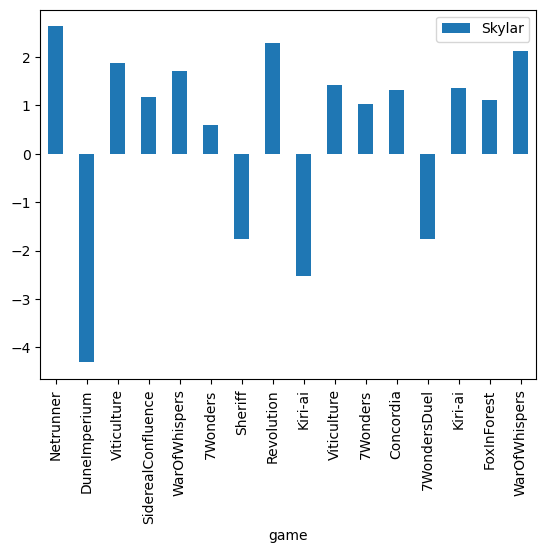

In [241]:
player = 'Skylar'
diffs = games_df[games_df['players'].apply(lambda x: player in x)].join(ranking_hist[player].apply(lambda x: x.mu))[player].diff()
diffs.iloc[0] = games_df[games_df['players'].apply(lambda x: player in x)].join(ranking_hist[player].apply(lambda x: x.mu)).iloc[0][player] - 25
diffs = pd.DataFrame(diffs)
diffs['game'] = games_df[games_df['players'].apply(lambda x: player in x)]['game_played']
diffs.set_index('game', inplace=True)
diffs.plot(kind='bar')

In [242]:
diffs

,Skylar
game,
Netrunner,2.635389
DuneImperium,-4.314582
Viticulture,1.885944
SiderealConfluence,1.176430
WarOfWhispers,1.713853
7Wonders,0.598492
Sheriff,-1.760765
Revolution,2.284539
Kiri-ai,-2.524503


In [243]:
player_games_df.groupby('players').describe()

index                                                        \
         count       mean   min    25%   50%    75%   max        std   
players                                                                
Alecia     3.0  41.333333  35.0  38.50  42.0  44.50  47.0   6.027714   
Brenna    12.0  24.750000   1.0  11.00  22.5  37.75  57.0  17.300158   
Caitlin    3.0   8.666667   5.0   7.50  10.0  10.50  11.0   3.214550   
Camilla    3.0  30.333333  29.0  29.50  30.0  31.00  32.0   1.527525   
Celeste    2.0   4.500000   1.0   2.75   4.5   6.25   8.0   4.949747   
Dane       6.0  37.000000   9.0  27.25  31.5  54.50  62.0  20.832667   
Dani       1.0  39.000000  39.0  39.00  39.0  39.00  39.0        NaN   
Gaby       7.0  48.285714  36.0  41.00  46.0  55.50  63.0  10.011898   
Guy        3.0  62.000000  61.0  61.50  62.0  62.50  63.0   1.000000   
Hamen      2.0   3.500000   1.0   2.25   3.5   4.75   6.0   3.535534   
J          6.0  29.666667   7.0  16.00  37.5  38.75  48.0  17.247222   
Jess       2.0  59.500000  59.0  59.25  59.5  59.75  60.0   0.707107   
Jesse      1.0   4.000000   4.0   4.00   4.0   4.00   4.0        NaN   
John      14.0  26.714286   1.0  14.25  20.5  39.50  55.0  18.623511   
Judson     7.0  47.428571  36.0  41.00  46.0  55.50  57.0   8.715066   
Jules      6.0  29.833333  16.0  21.25  25.5  32.00  58.0  15.078683   
Karson    12.0  36.000000  15.0  26.50  37.5  45.75  53.0  12.269697   
Kate       6.0  52.666667  40.0  49.25  54.0  58.75  60.0   7.788881   
Kristi     6.0  50.666667  35.0  48.75  54.5  55.75  57.0   8.453796   
Les       12.0  33.833333   7.0  18.75  29.5  48.25  63.0  19.976501   
Libby      1.0  39.000000  39.0  39.00  39.0  39.00  39.0        NaN   
Lindsey    3.0  24.666667  16.0  20.50  25.0  29.00  33.0   8.504901   
Mac        2.0  59.500000  59.0  59.25  59.5  59.75  60.0   0.707107   
Matt       2.0  10.500000  10.0  10.25  10.5  10.75  11.0   0.707107   
Matty      5.0  45.800000  35.0  42.00  47.0  48.00  57.0   8.105554   
Max       14.0  24.714286   0.0  12.75  21.5  39.50  52.0  16.278483   
Meghann    1.0   7.000000   7.0   7.00   7.0   7.00   7.0        NaN   
Paul      11.0  28.181818   7.0  17.00  24.0  38.50  63.0  16.898628   
Preston   10.0  14.600000   2.0   5.25  16.5  21.25  31.0   9.766155   
Rachel     8.0  30.125000  15.0  21.50  28.5  36.25  52.0  12.322308   
Reed       1.0  13.000000  13.0  13.00  13.0  13.00  13.0        NaN   
Ryan       3.0  62.000000  61.0  61.50  62.0  62.50  63.0   1.000000   
Scoggins   8.0  33.125000   0.0   3.75  44.0  53.00  60.0  26.275668   
Skylar    16.0  28.062500   2.0  16.50  25.5  40.50  52.0  16.478142   
Toph       6.0  29.666667  16.0  21.25  25.5  31.25  58.0  15.028861   
Zack      18.0  27.000000   0.0  17.50  29.5  37.50  52.0  14.475131   

         game_start                                                      \
              count                           mean                  min   
players                                                                   
Alecia            3            2024-12-09 11:41:20  2024-12-09 09:37:00   
Brenna           12            2023-12-09 21:55:40  2022-12-09 09:45:00   
Caitlin           3            2022-12-09 14:50:00  2022-12-09 11:00:00   
Camilla           3            2023-12-09 12:49:40  2023-12-09 09:45:00   
Celeste           2            2022-12-09 12:37:30  2022-12-09 09:45:00   
Dane              6            2024-04-09 18:38:40  2022-12-09 15:00:00   
Dani              1            2024-12-09 12:36:00  2024-12-09 12:36:00   
Gaby              7            2024-12-09 13:45:00  2024-12-09 09:15:00   
Guy               3            2024-12-09 15:25:20  2024-12-09 13:27:00   
Hamen             2            2022-12-09 11:45:00  2022-12-09 09:45:00   
J                 6            2024-04-09 20:25:50  2022-12-09 10:08:00   
Jess              2            2024-12-09 10:50:00  2024-12-09 10:30:00   
Jesse             1            2022-12-09 12:00:00  2022-12-09 12:00:00   


In [244]:
ranking_hist_long = ranking_hist.melt(ignore_index=False)

In [245]:
ranking_hist_long.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
      dtype='int64', length=2304)

In [269]:
array_of_unique_players = np.unique(player_games_df['players'])
win_matrix = np.empty((array_of_unique_players.size, array_of_unique_players.size))
for player_1 in array_of_unique_players:
    for player_2 in array_of_unique_players:
        win_matrix[np.argmax(array_of_unique_players == player_1), np.argmax(array_of_unique_players== player_2)] = round(model.predict_win([[player_rankings[player_1]], [player_rankings[player_2]]])[0],2)
pd.DataFrame(win_matrix, columns=array_of_unique_players, index=array_of_unique_players).loc[player]

Alecia      0.83
Brenna      0.94
Caitlin     0.76
Camilla     0.89
Celeste     0.70
Dane        0.79
Dani        0.67
Gaby        0.90
Guy         0.75
Hamen       0.79
J           0.89
Jess        0.91
Jesse       0.85
John        0.87
Judson      0.41
Jules       0.91
Karson      0.53
Kate        0.93
Kristi      0.43
Les         0.90
Libby       0.77
Lindsey     0.87
Mac         0.71
Matt        0.77
Matty       0.84
Max         0.28
Meghann     0.85
Paul        0.92
Preston     0.79
Rachel      0.32
Reed        0.82
Ryan        0.65
Scoggins    0.68
Skylar      0.50
Toph        0.56
Zack        0.65
Name: Skylar, dtype: float64